In [87]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sb

In [142]:
mpl.rcParams.update(mpl.rcParamsDefault)

sb.set()
sb.set_context("talk")
colors = sb.color_palette("colorblind")

plt.rc("font", weight="bold")
plt.rc("axes", labelsize=16, labelweight="bold")
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

In [3]:
path_data = Path('/home/rmanser/dask_ams/data')

In [4]:
numpy_data = [
    pd.read_csv(path_data / f'numpy_{n}.csv').drop(columns='Unnamed: 0')
    for n in range(4, 37)
]

In [5]:
dask_data = [
    pd.read_csv(path_data / f'dask_{n}.csv').drop(columns='Unnamed: 0')
    for n in range(2, 37)
]

In [49]:
numpy_df = pd.concat(numpy_data, ignore_index=True)
dask_df = pd.concat(dask_data, ignore_index=True)

# There is no numpy data for 2 and 3 cores, so fill in the gaps with nans
nans_df = pd.DataFrame(index=pd.Index([2, 3]), columns=numpy_df.columns)
numpy_df = pd.concat([nans_df, numpy_df])

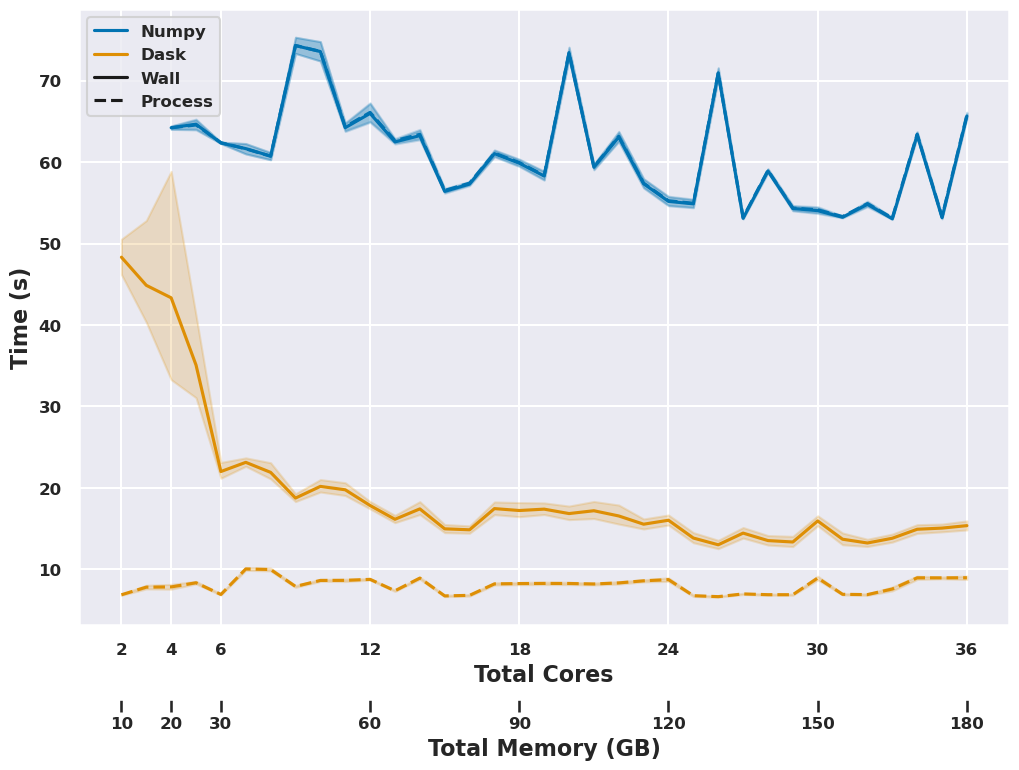

In [143]:
fig, ax = plt.subplots(figsize=(12, 8))

for y in ["Wall Time", "Processor Time"]:
    sb.lineplot(data=numpy_df, x="Total Cores", y=y, ci=95, n_boot=10000, ax=ax, color=colors[0], label="Numpy")
    sb.lineplot(data=dask_df, x="Total Cores", y=y, ci=95, n_boot=10000, ax=ax, color=colors[1], label="Dask")

# Modify line styles (dashed for process time)
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")

ax.set_ylabel("Time (s)")
ax.set_xticks([2, 4] + [n for n in range(6, 42, 6)])

# Add an additional x axis for memory
secax = ax.secondary_xaxis(-0.12, functions=(lambda x: x * 5, lambda x: x * 5))
secax.set_xlabel("Total Memory (GB)")
secax.set_xticks([10, 20] + [n * 5 for n in range(6, 42, 6)])

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
solid_line = mlines.Line2D([], [], color="k", label="Wall")
dashed_line = mlines.Line2D([], [], color="k", linestyle="--", label="Process")
labels = [
    "Numpy",
    "Dask",
    "Wall",
    "Process"
]
handles = handles[:2] + [solid_line, dashed_line]
plt.legend(handles=handles, labels=labels)

plt.savefig('/home/rmanser/dask_ams/performance.png', bbox_inches='tight')

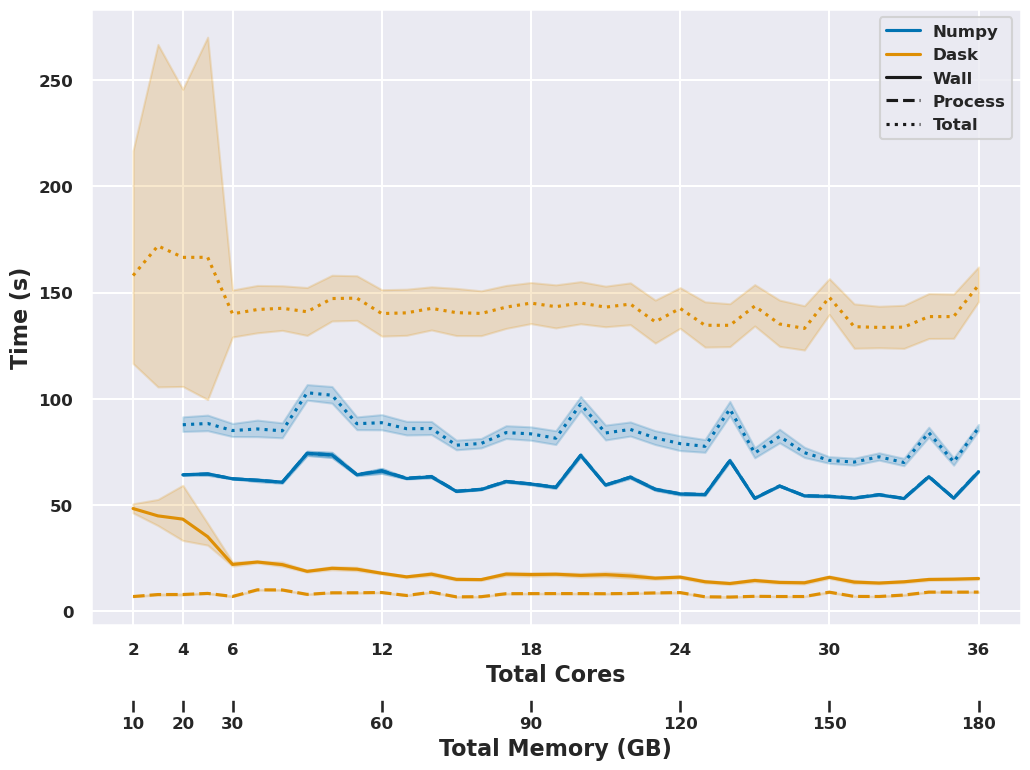

In [146]:
fig, ax = plt.subplots(figsize=(12, 8))

for y in ["Wall Time", "Processor Time", "Overhead Time"]:
    sb.lineplot(data=numpy_df, x="Total Cores", y=y, ci=95, n_boot=10000, ax=ax, color=colors[0], label="Numpy")
    sb.lineplot(data=dask_df, x="Total Cores", y=y, ci=95, n_boot=10000, ax=ax, color=colors[1], label="Dask")

# Modify line styles (dashed for process time, dotted for total time)
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.lines[4].set_linestyle(":")
ax.lines[5].set_linestyle(":")

ax.set_ylabel("Time (s)")
ax.set_xticks([2, 4] + [n for n in range(6, 42, 6)])

# Add an additional x axis for memory
secax = ax.secondary_xaxis(-0.12, functions=(lambda x: x * 5, lambda x: x * 5))
secax.set_xlabel("Total Memory (GB)")
secax.set_xticks([10, 20] + [n * 5 for n in range(6, 42, 6)])

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
solid_line = mlines.Line2D([], [], color="k", label="Wall")
dashed_line = mlines.Line2D([], [], color="k", linestyle="--", label="Process")
dotdashed_line = mlines.Line2D([], [], color="k", linestyle=":", label="Total")
labels = ["Numpy", "Dask", "Wall", "Process", "Total"]
handles = handles[:2] + [solid_line, dashed_line, dotdashed_line]
plt.legend(handles=handles, labels=labels)

plt.savefig('/home/rmanser/dask_ams/performance_total.png', bbox_inches='tight')